### Data Pre-processing

In [ ]:
# Renaming images
'''
import os
db_path = "/content/drive/MyDrive/Deep learning Class Project/Group4_db"
class_num = 1
for dirname in sorted(os.listdir(db_path)):
    merged_path = os.path.join(db_path, dirname)
    if os.path.isdir(merged_path):
       print(dirname)
       #holder, class_num = dirname.split('-', 2)
       counter = 0
       for i, filename in enumerate(os.listdir(merged_path)):
           img_class, img_type = filename.split('.', 2)
           img_merged_path = os.path.join(merged_path, filename)
           new_filename = os.path.join(merged_path, str(class_num) + '_'+ str(counter) + '.png')
           print(new_filename)
           os.rename(img_merged_path, new_filename) 
           counter = counter + 1    
    class_num = class_num + 1
 '''   

'\nimport os\ndb_path = "/content/drive/MyDrive/Deep learning Class Project/Group4_db"\nclass_num = 1\nfor dirname in sorted(os.listdir(db_path)):\n    merged_path = os.path.join(db_path, dirname)\n    if os.path.isdir(merged_path):\n       print(dirname)\n       #holder, class_num = dirname.split(\'-\', 2)\n       counter = 0\n       for i, filename in enumerate(os.listdir(merged_path)):\n           img_class, img_type = filename.split(\'.\', 2)\n           img_merged_path = os.path.join(merged_path, filename)\n           new_filename = os.path.join(merged_path, str(class_num) + \'_\'+ str(counter) + \'.png\')\n           print(new_filename)\n           os.rename(img_merged_path, new_filename) \n           counter = counter + 1    \n    class_num = class_num + 1\n '

In [ ]:
# Create directories for every class in training, validation and test sets
'''
import os
from shutil import copyfile
db_path = "/content/drive/MyDrive/Deep learning Class Project/Group4_db"
classes = os.listdir(db_path)
try:
   os.mkdir('/content/drive/MyDrive/Deep learning Class Project/dataset')
   os.mkdir('/content/drive/MyDrive/Deep learning Class Project/dataset/training')
   os.mkdir('/content/drive/MyDrive/Deep learning Class Project/dataset/validation')
   os.mkdir('/content/drive/MyDrive/Deep learning Class Project/dataset/test')
except OSError:
  pass

training_dir_path=[f'/content/drive/MyDrive/Deep learning Class Project/dataset/training/{a}' for a in classes]
print('\n',training_dir_path)
validation_dir_path=[f'/content/drive/MyDrive/Deep learning Class Project/dataset/validation/{a}' for a in classes]
print('\n',validation_dir_path)
testing_dir_path=[f'/content/drive/MyDrive/Deep learning Class Project/dataset/test/{a}' for a in classes]
print('\n',testing_dir_path)
'''


'\nimport os\nfrom shutil import copyfile\ndb_path = "/content/drive/MyDrive/Deep learning Class Project/Group4_db"\nclasses = os.listdir(db_path)\ntry:\n   os.mkdir(\'/content/drive/MyDrive/Deep learning Class Project/dataset\')\n   os.mkdir(\'/content/drive/MyDrive/Deep learning Class Project/dataset/training\')\n   os.mkdir(\'/content/drive/MyDrive/Deep learning Class Project/dataset/validation\')\n   os.mkdir(\'/content/drive/MyDrive/Deep learning Class Project/dataset/test\')\nexcept OSError:\n  pass\n\ntraining_dir_path=[f\'/content/drive/MyDrive/Deep learning Class Project/dataset/training/{a}\' for a in classes]\nprint(\'\n\',training_dir_path)\nvalidation_dir_path=[f\'/content/drive/MyDrive/Deep learning Class Project/dataset/validation/{a}\' for a in classes]\nprint(\'\n\',validation_dir_path)\ntesting_dir_path=[f\'/content/drive/MyDrive/Deep learning Class Project/dataset/test/{a}\' for a in classes]\nprint(\'\n\',testing_dir_path)\n'

In [ ]:
# Split Data into training, validation and test sets
'''
paths, dirs, file_name = next(os.walk("/content/drive/MyDrive/Deep learning Class Project/Group4_db/"))
for dir in dirs:
    path_h, dirs_h, files = next(os.walk(os.path.join("/content/drive/MyDrive/Deep learning Class Project/Group4_db/", dir)))
    file_count = len(files)
    print("{}: {}".format(dir, file_count))


    # here we split into train, test and validation
    training_length = int(len(files)* 0.85)
    validation_length = int(len(files) * 0.10)
    testing_length = int(len(files) - training_length - validation_length)
    
    temp_folder = []
    merged_path = os.path.join(db_path, dir)
    for i, imgs in enumerate(os.listdir(merged_path)):
        temp_folder.append(imgs)        

    training_set = temp_folder[0: training_length]
    validation_set = temp_folder[training_length+1 : (training_length+validation_length)]
    testing_set = temp_folder[:testing_length]

    train_path = '/content/drive/MyDrive/Deep learning Class Project/dataset/training'
    try:
        os.mkdir(os.path.join(train_path, dir))
    except OSError:
        pass

    for filename in training_set:
        this_file = os.path.join(merged_path, filename)
        temp_dest1 = os.path.join(train_path, dir)
        destination = os.path.join(temp_dest1, filename)
        copyfile(this_file, destination)

    validation_path = '/content/drive/MyDrive/Deep learning Class Project/dataset/validation'
    try:
        os.mkdir(os.path.join(validation_path, dir))
    except OSError:
        pass

    for filename in validation_set:
        this_file = os.path.join(merged_path, filename)
        temp_dest2 = os.path.join(validation_path, dir)
        destination = os.path.join(temp_dest2, filename)
        copyfile(this_file, destination)
        
    test_path = '/content/drive/MyDrive/Deep learning Class Project/dataset/test'
    try:
        os.mkdir(os.path.join(test_path, dir))
    except OSError:
        pass

    for filename in testing_set:
        this_file = os.path.join(merged_path, filename)
        temp_dest3 = os.path.join(test_path, dir)
        destination = os.path.join(temp_dest3, filename)
        copyfile(this_file, destination)
'''
'''
# Sample Display
print(dir)
print(training_length)
print(validation_length)
print(testing_length)
'''

'\n# Sample Display\nprint(dir)\nprint(training_length)\nprint(validation_length)\nprint(testing_length)\n'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical 

img_height, img_width = 224, 224
batch_size = 32
learning_rate = 3e-4
epochs = 100

#db_path = "/content/drive/MyDrive/Deep learning Class Project/plankton_db"
train_path = '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/training'
validation_path = '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/validation'
test_path = '/content/drive/MyDrive/Deep learning Class Project/dataset_pm/test'

#train_path = '/content/drive/MyDrive/Deep learning Class Project/dataset/training'
#validation_path = '/content/drive/MyDrive/Deep learning Class Project/dataset/validation'
#test_path = '/content/drive/MyDrive/Deep learning Class Project/dataset/test'

train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

print('Total number of images for training: ')
train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size, 
                                                    class_mode = "categorical")


print('Total number of images for validation: ')
val_generator = val_datagen.flow_from_directory(validation_path,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size, 
                                                class_mode = "categorical",
                                                shuffle = False)

print('Total number of images for testing: ')
test_generator = test_datagen.flow_from_directory(test_path,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size, 
                                                class_mode = "categorical",
                                                shuffle = False)  

nb_train_samples = len(train_generator.filenames) 
num_classes = len(train_generator.class_indices)
print("Number of classes: ", num_classes)  

Total number of images for training: 
Found 2872 images belonging to 19 classes.
Total number of images for validation: 
Found 92 images belonging to 19 classes.
Total number of images for testing: 
Found 118 images belonging to 19 classes.
Number of classes:  19


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)      

In [ ]:
stepPerEpoch_training =  150 // batch_size
checkpoint = ModelCheckpoint("plankton_bm_classifier.h5", 
                             monitor = 'val_acc',
                             verbose=1, 
                             save_best_only = True, 
                             save_Weights_only = False, 
                             mode = 'auto', period=1)

model.compile(loss = "categorical_crossentropy", 
              optimizer = optimizers.Adam(lr = learning_rate, clipnorm = 1.),
              metrics = ['acc'])

history = model.fit(train_generator,
                    steps_per_epoch=stepPerEpoch_training,
                    epochs=epochs,
                    shuffle=True,
                    validation_data=val_generator,
                    callbacks=[checkpoint])

Epoch 1/100
4/4 [==============================] - 104s 19s/step - loss: 2.9575 - acc: 0.1146 - val_loss: 2.9972 - val_acc: 0.0109

Epoch 00001: val_acc improved from -inf to 0.01087, saving model to plankton_bm_classifier.h5
Epoch 2/100
4/4 [==============================] - 76s 19s/step - loss: 2.9456 - acc: 0.0885 - val_loss: 2.9658 - val_acc: 0.0217

Epoch 00002: val_acc improved from 0.01087 to 0.02174, saving model to plankton_bm_classifier.h5
Epoch 3/100
4/4 [==============================] - 59s 14s/step - loss: 2.9005 - acc: 0.0708 - val_loss: 2.9904 - val_acc: 0.0217

Epoch 00003: val_acc did not improve from 0.02174
Epoch 4/100
4/4 [==============================] - 62s 16s/step - loss: 2.9751 - acc: 0.0271 - val_loss: 2.9796 - val_acc: 0.0326

Epoch 00004: val_acc improved from 0.02174 to 0.03261, saving model to plankton_bm_classifier.h5
Epoch 5/100
4/4 [==============================] - 66s 17s/step - loss: 2.9227 - acc: 0.0740 - val_loss: 2.9648 - val_acc: 0.0435

Epoch 

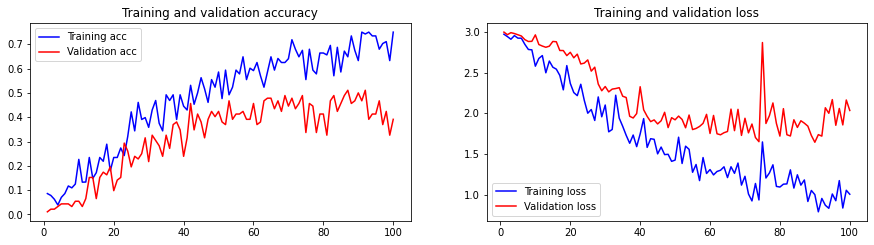

In [ ]:
import matplotlib.pyplot as plt

model = models.load_model("plankton_bm_classifier.h5")

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(1, figsize = (15,8))
plt.subplot(221)
plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
#plt.savefig('Accuracy.jpg')

plt.subplot(222)
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Accuracy in test set: 64.4% 


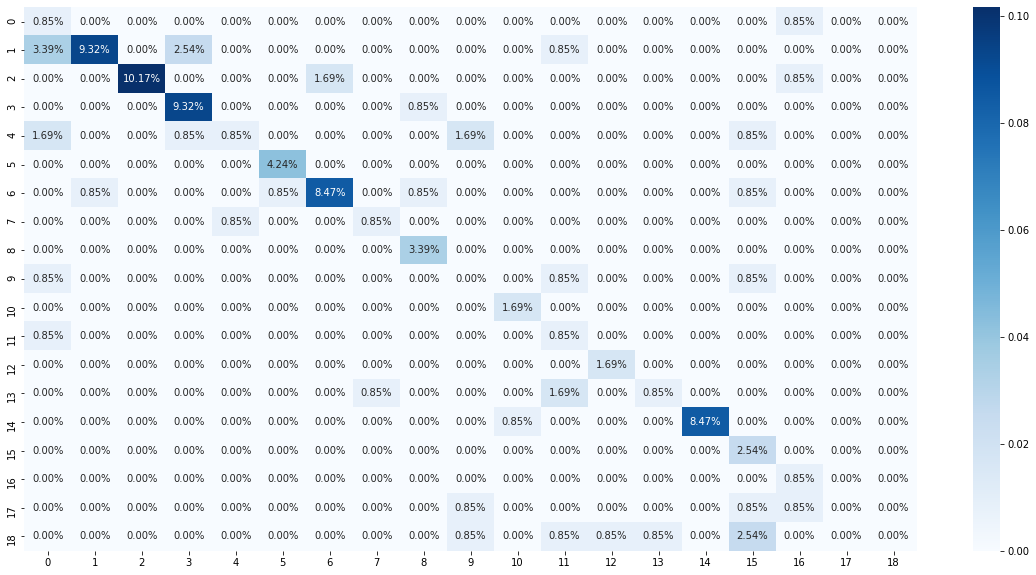

In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize = (20,10))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', annot_kws={"size": 10})

accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.11      0.50      0.18         2
           1       0.92      0.58      0.71        19
           2       1.00      0.80      0.89        15
           3       0.73      0.92      0.81        12
           4       0.50      0.14      0.22         7
           5       0.83      1.00      0.91         5
           6       0.83      0.71      0.77        14
           7       0.50      0.50      0.50         2
           8       0.67      1.00      0.80         4
           9       0.00      0.00      0.00         3
          10       0.67      1.00      0.80         2
          11       0.17      0.50      0.25         2
          12       0.67      1.00      0.80         2
          13       0.50      0.25      0.33         4
          14       1.00      0.91      0.95        11
          15       0.30      1.00      0.46         3
          16       0.25      1.00      0.40         1
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%cd /content/drive/MyDrive/Deep learning Class Project/

/content/drive/MyDrive/Deep learning Class Project


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

In [ ]:
!jupyter nbconvert --to pdf Basic_Model.ipynb

[NbConvertApp] Converting notebook Basic_Model.ipynb to pdf
[NbConvertApp] Support files will be in Basic_Model_files/
[NbConvertApp] Making directory ./Basic_Model_files
[NbConvertApp] Making directory ./Basic_Model_files
[NbConvertApp] Writing 95097 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 153742 bytes to Basic_Model.pdf
